# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_names = pd.read_csv('Restaurant names and Metadata.csv')
data_reviews = pd.read_csv('Restaurant reviews.csv')

In [3]:
data_names.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
data_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [5]:
data_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [6]:
data_names.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [7]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [8]:
data_reviews.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

# Merging Two Data Sets

Merging files of restaurants and names and reviews.
After the merging, final dataset will have a data set with individual customer reviews and ratings for the restaurants and restaurant details.

In [9]:
# Renaming restaurant column as name:
data_reviews = data_reviews.rename(columns={'Restaurant': 'Name'})

# Merging the two data sets:
df = pd.merge(data_reviews, data_names, how='left', on='Name')

# Dropping the columns which are not needed:
df.drop(['Reviewer', 'Time', 'Pictures', 'Links', 'Collections'], axis=1, inplace=True)
df.head()

,Name,Review,Rating,Metadata,Cost,Cuisines,Timings
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


# Preparing Cost and Rating Columns

In [10]:
# Changing cost and rating columns to appropriate datatypes:
df['Cost'] = df['Cost'].str.replace(',', '').astype(int)
df['Rating'] = df['Rating'].str.replace('Like', '1').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      10000 non-null  object 
 1   Review    9955 non-null   object 
 2   Rating    9962 non-null   float64
 3   Metadata  9962 non-null   object 
 4   Cost      10000 non-null  int32  
 5   Cuisines  10000 non-null  object 
 6   Timings   9900 non-null   object 
dtypes: float64(1), int32(1), object(5)
memory usage: 585.9+ KB


## Handling Missing Values

In [12]:
#Calculate the total number of missing values in each column 
nullvalues_count = df.isna().sum().sort_values(ascending = False)
nullvalues_percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_values = pd.concat([nullvalues_count, nullvalues_percent], axis = 1, keys=["nullvalues_count","nullvalues_Percent (%)"])
missing_values

,nullvalues_count,nullvalues_Percent (%)
Timings,100,1.00
Review,45,0.45
Rating,38,0.38
Metadata,38,0.38
Name,0,0.00
Cost,0,0.00
Cuisines,0,0.00


In [13]:
# Examine missing Rating values:
df['Name'][df['Rating'].isnull() == True].value_counts()

American Wild Wings    23
Arena Eleven           15
Name: Name, dtype: int64

In [14]:
print('Mean of Rating for American Wild Wings: ', df['Rating'][df['Name'] == 'American Wild Wings'].mean())
print('Mean of Rating for Arena Eleven: ', df['Rating'][df['Name'] == 'Arena Eleven'].mean())
print('Overall Mean of Ratings: ', df['Rating'].mean())

Mean of Rating for American Wild Wings:  3.9740259740259742
Mean of Rating for Arena Eleven:  4.117647058823529
Overall Mean of Ratings:  3.6007829753061635


In [15]:
df['Rating'].fillna(4, inplace=True)

# Changing NaN reviews by '-'
df['Review'] = df['Review'].fillna('-')
df.isnull().sum()

Name          0
Review        0
Rating        0
Metadata     38
Cost          0
Cuisines      0
Timings     100
dtype: int64

## Separating Metadata (Reviews and Followers)

In [16]:
# Filling missing values:
df['Metadata'].fillna('0 Review , 0 Follower', inplace=True)

# Standardizing strings
df['Metadata'] = df['Metadata'].str.replace('Reviews', 'Review')
df['Metadata'] = df['Metadata'].str.replace('Followers', 'Follower')

df['Metadata'][df['Metadata'].str.endswith('w')] = df['Metadata'][df['Metadata'].str.endswith('w')] + ' , - Follower'

# Splitting into two columns
df[['Reviews', 'Followers']] = df['Metadata'].str.split(' , ', expand=True)

# Erasing wording from the columns
df['Reviews'] = df['Reviews'].str.replace('Review', '')
df['Reviews'] = df['Reviews'].str.replace('Posts', '')
df['Reviews'] = df['Reviews'].str.replace('Post', '')

df['Followers'] = df['Followers'].str.replace('Follower', '')
df['Followers'] = df['Followers'].str.replace('-', '0')

# Changing str values to integers
df[['Reviews', 'Followers']] = df[['Reviews', 'Followers']].astype(int)

# Dropping the initial column
df.drop(['Metadata'], axis=1, inplace=True)

# Sorting restaurants with their names and costs
df = df.sort_values(['Name', 'Cost'], ascending=False).reset_index()
df.drop('index', axis=1, inplace=True)

## Creating New Features (Mean of Ratings, Reviews, and Followers)

In [17]:
restaurants = list(df['Name'].unique())
df['Mean Rating'] = 0
df['Mean Reviews'] = 0
df['Mean Followers'] = 0

for i in range(len(restaurants)):
    df['Mean Rating'][df['Name'] == restaurants[i]] = df['Rating'][df['Name'] == restaurants[i]].mean()
    df['Mean Reviews'][df['Name'] == restaurants[i]] = df['Reviews'][df['Name'] == restaurants[i]].mean()
    df['Mean Followers'][df['Name'] == restaurants[i]] = df['Followers'][df['Name'] == restaurants[i]].mean()

In [18]:
df.sample(3)

,Name,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers,Mean Rating,Mean Reviews,Mean Followers
425,Urban Asia - Kitchen & Bar,"On a Saturday casual lunch, i was simply floor...",4.0,1100,"Asian, Thai, Chinese, Sushi, Momos","12 Noon to 3 PM, 7 PM to 11 PM",207,1051,3.65,39.34,192.30
1992,T Grill,"Good food, value for money. We need not wait f...",4.5,700,"North Indian, Andhra, Biryani, Chinese","12:30 PM to 3:30 PM, 7 PM to 11 PM",34,530,3.17,38.93,322.22
4890,Khaan Saab,We went to this restaurant for new year lunch ...,1.0,1100,"North Indian, Mughlai","12 Noon to 3:30 PM, 7 PM to 11:30 PM",17,9,3.80,12.23,188.17


## Feature Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,5))

df[['Mean Rating', 'Mean Reviews', 'Mean Followers']] = scaler.fit_transform(df[['Mean Rating', 'Mean Reviews', 'Mean Followers']]).round(2)

df.sample(5)

,Name,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers,Mean Rating,Mean Reviews,Mean Followers
6821,Dunkin' Donuts,Food - 5\nVFM - 3.5\nPacking - 3.5\nService 3....,4.0,550,"Desserts, Cafe, Beverages, Burger, Fast Food",10 AM to 11 PM,77,323,2.12,4.16,3.94
9330,American Wild Wings,gOOd Ambience for Friends and Families with Li...,5.0,600,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,19,31,3.55,2.00,2.95
623,Udipi's Upahar,My go to place for all my South Indian Tiffin ...,5.0,500,"South Indian, North Indian, Chinese",6 AM to 10:30 PM,125,1812,3.63,1.96,2.07
9999,10 Downing Street,A nice noisy eventful Saturday night happens h...,4.0,1900,"North Indian, Chinese, Continental",12 Noon to 12 Midnight,22,68,3.26,3.35,2.90
8349,Beyond Flavours,"Quite good ambience,liked special restro birya...",5.0,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,13,4.03,1.31,1.75


# Text Preprocessig and Cleaning

In [21]:
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# 3 examples of these columns before text processing:
df[['Review', 'Cuisines']].sample(3)

,Review,Cuisines
3380,Wrong Order Received,"North Indian, Chinese, Biryani"
4411,Best brownies and cupcakes in the town... That...,"Bakery, Desserts"
3037,"Staff is good and courteous, but the food is p...","Andhra, South Indian, North Indian"


In [27]:
import nltk
nltk.download('stopwords')

# Define symbols to be replaced by space
replace_space = re.compile('[/(){}\[\]\|@,;]')
# Define symbols to be removed
remove_symbols = re.compile('[^0-9a-z #+_]')
# Define stopwords
stopwords = set(stopwords.words('english'))

def text_preprocessing(text):
    # Lowercase all the letters
    text = text.lower()
    
    # Replace these symbols with space
    text = replace_space.sub(' ', text)
    
    # Remove these symbols
    text = remove_symbols.sub('', text)
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords)
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeanb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [28]:
df['Review'] = df['Review'].apply(text_preprocessing)
df['Cuisines'] = df['Cuisines'].apply(text_preprocessing)

In [29]:
# text after processed:
df[['Review','Cuisines']].sample(5)

,Review,Cuisines
9450,superb,north indian chinese seafood biryani hyderabadi
7008,pathetic experiencenever order outletthey neit...,fast food pizza
4311,food good ambience interior nice groups couple...,arabian north indian chinese
8878,#abdul helped us taste best ambience great jub...,american
5057,decent,bakery fast food desserts


## EDA - Analysing of Restaurants and Popularities

In [30]:
# RESTAURANT NAMES:
restaurant_names = list(df['Name'].unique())
restaurant_names

['eat.fit',
 "Zing's Northeast Kitchen",
 'Zega - Sheraton Hyderabad Hotel',
 'Yum Yum Tree - The Arabian Food Court',
 'Urban Asia - Kitchen & Bar',
 'Ulavacharu',
 "Udipi's Upahar",
 'Triptify',
 'Tiki Shack',
 'The Tilt Bar Republic',
 'The Old Madras Baking Company',
 'The Lal Street - Bar Exchange',
 'The Indi Grill',
 'The Glass Onion',
 'The Foodie Monster Kitchen',
 "The Fisherman's Wharf",
 'The Chocolate Room',
 'Tempteys',
 'Tandoori Food Works',
 'T Grill',
 'Squeeze @ The Lime',
 'Shree Santosh Dhaba Family Restaurant',
 'Shanghai Chef 2',
 'Shah Ghouse Spl Shawarma',
 'Shah Ghouse Hotel & Restaurant',
 "Sardarji's Chaats & More",
 'SKYHY',
 'Royal Spicy Restaurant',
 'Prism Club & Kitchen',
 'PourHouse7',
 'Pot Pourri',
 'Pista House',
 'Paradise',
 'Pakwaan Grand',
 'Owm Nom Nom',
 'Over The Moon Brew Company',
 'Olive Garden',
 'NorFest - The Dhaba',
 'Mustang Terrace Lounge',
 'Momos Delight',
 'Mohammedia Shawarma',
 'Mazzo - Marriott Executive Apartments',
 'Mathura 

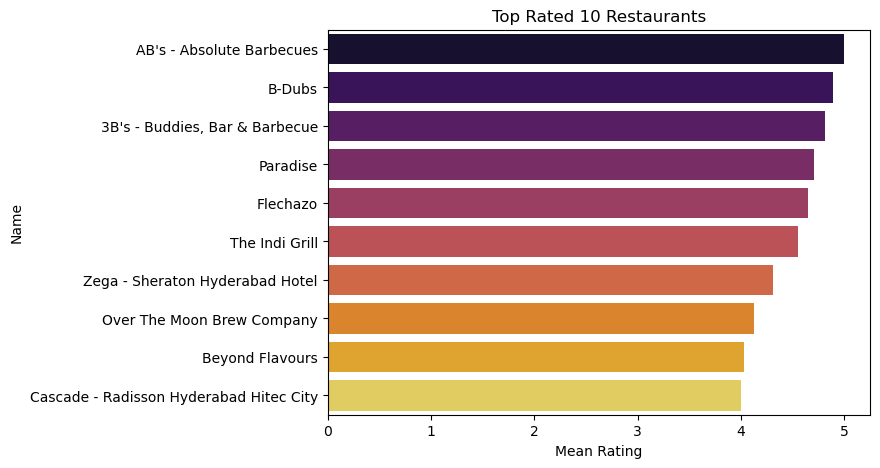

In [33]:
df_rating = df.drop_duplicates(subset='Name')
df_rating = df_rating.sort_values(by='Mean Rating', ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(data=df_rating, x='Mean Rating', y='Name', palette='inferno')
plt.title('Top Rated 10 Restaurants');

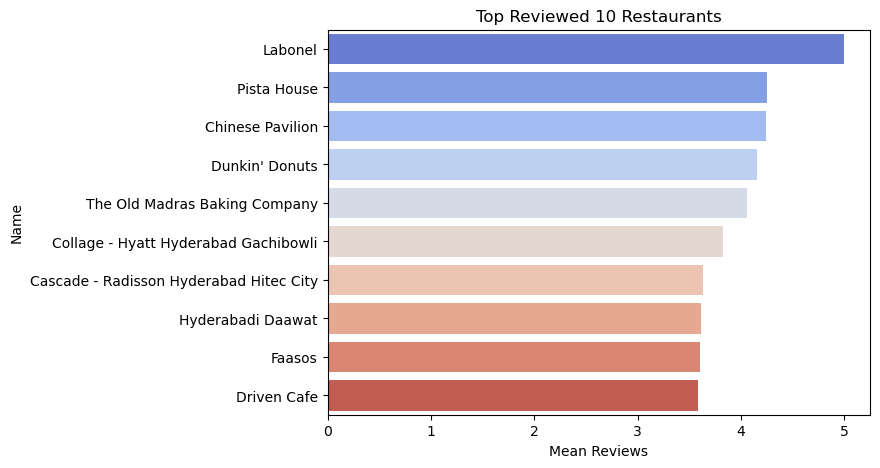

In [34]:
df_reviews = df.drop_duplicates(subset='Name')
df_reviews = df_reviews.sort_values(by='Mean Reviews', ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(data=df_reviews, x='Mean Reviews', y='Name', palette='coolwarm')
plt.title('Top Reviewed 10 Restaurants');

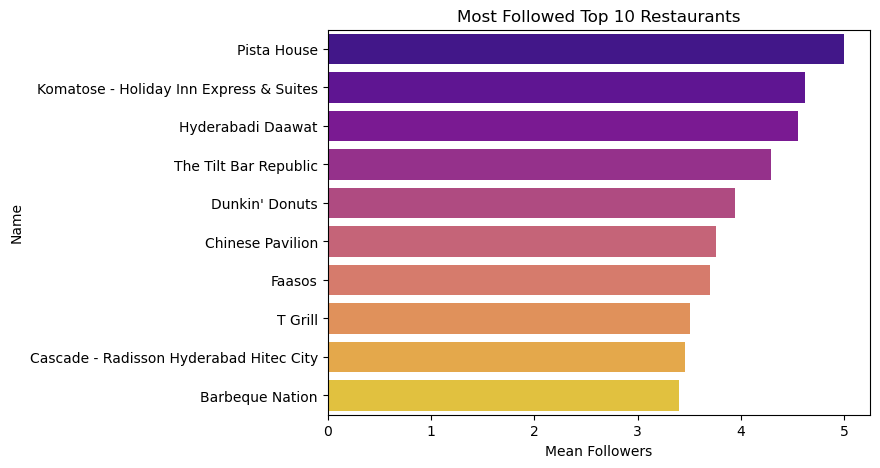

In [35]:
df_followers = df.drop_duplicates(subset='Name')
df_followers = df_followers.sort_values(by='Mean Followers', ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(data=df_followers, x='Mean Followers', y='Name', palette='plasma')
plt.title('Most Followed Top 10 Restaurants');

# EDA - Word Frequency Distribution:

In [36]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]

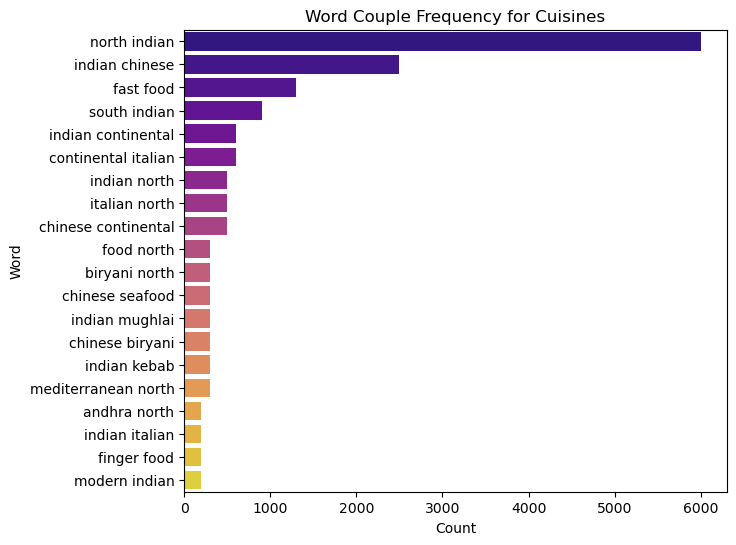

In [38]:
# Top 20 two word frequencies for Cuisines
list1 = get_top_words(df['Cuisines'], 20, (2,2))

df_words1 = pd.DataFrame(list1, columns=['Word', 'Count'])

plt.figure(figsize=(7,6))
sns.barplot(data=df_words1, x='Count', y='Word', palette='plasma')
plt.title('Word Couple Frequency for Cuisines');

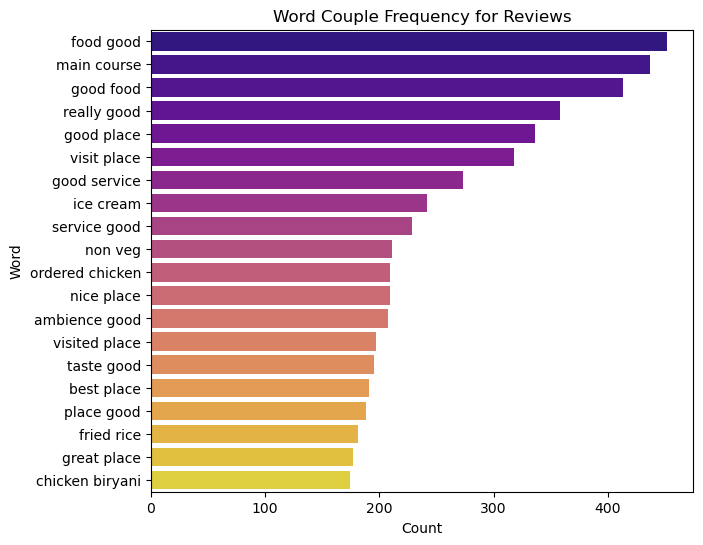

In [39]:
# Top 20 two word frequencies for Reviews
list2 = get_top_words(df['Review'], 20, (2,2))

df_words2 = pd.DataFrame(list2, columns=['Word', 'Count'])

plt.figure(figsize=(7,6))
sns.barplot(data=df_words2, x='Count', y='Word', palette='plasma')
plt.title('Word Couple Frequency for Reviews');

# CONTENT BASE RECOMMENDER SYSTEM

In [40]:
# Changing data set index by restaurant name
df.set_index('Name', inplace=True)

# Saving indexes in a series
indices = pd.Series(df.index)

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Review'])

# Calculating cosine similarities
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

# Creating the Recommender System:

In [41]:
 def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['Cuisines', 'Mean Rating', 'Cost', 'Timings'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df[['Cuisines','Mean Rating', 'Cost', 'Timings']][df.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['Cuisines','Mean Rating', 'Cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

In [42]:
# HERE IS A RANDOM RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df[df.index == 'Hyderabadi Daawat'].head(1)

,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers,Mean Rating,Mean Reviews,Mean Followers
Name,,,,,,,,,,
Hyderabadi Daawat,ordered veg biryani hyderabad daawat taste ave...,3.0,600,hyderabadi chinese mughlai,12:30pm to 11:30pm (Mon-Sun),5,0,3.31,3.61,4.55


In [43]:
# LET'S SEE WHAT ARE WE GOING TO BE RECOMMENDED:
recommend('Hyderabadi Daawat')

TOP 10 RESTAURANTS LIKE Hyderabadi Daawat WITH SIMILAR REVIEWS: 


,Cuisines,Mean Rating,Cost,Timings
Cream Stone,ice cream desserts,3.33,350,"10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."
Hyderabadi Daawat,hyderabadi chinese mughlai,3.31,600,12:30pm to 11:30pm (Mon-Sun)
Hyper Local,american chinese north indian kebab south indian,3.00,1000,12 Noon to 12 Midnight
Triptify,north indian,2.85,400,11 AM to 11 PM
Owm Nom Nom,chinese biryani andhra north indian,2.44,900,12Noon to 11:30PM (Mon-Sun)
Tandoori Food Works,north indian burger kebab,2.40,500,"12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)..."
Sardarji's Chaats & More,street food north indian fast food,2.37,400,"12 Noon to 3:30 PM, 7 PM to 10:30 PM"
Pista House,bakery north indian mughlai juices chinese,2.34,1000,11 AM to 12 Midnight
eat.fit,healthy food north indian continental south in...,2.29,500,7 AM to 10 PM
T Grill,north indian andhra biryani chinese,2.24,700,"12:30 PM to 3:30 PM, 7 PM to 11 PM"


In [44]:
# HERE IS A BAKERY. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df[df.index == 'Labonel'].head(1)

,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers,Mean Rating,Mean Reviews,Mean Followers
Name,,,,,,,,,,
Labonel,let make simple brownies die huge variety cupc...,4.0,1000,bakery desserts,"11 AM to 8 PM (Mon-Sat), Sun Closed",18,86,3.44,5.0,3.27


In [45]:
# LET'S SEE WHAT ARE WE GOING TO BE RECOMMENDED:
recommend('Labonel')

TOP 3 RESTAURANTS LIKE Labonel WITH SIMILAR REVIEWS: 


,Cuisines,Mean Rating,Cost,Timings
Cream Stone,ice cream desserts,3.33,350,"10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."
Karachi Cafe,cafe desserts fast food,3.12,600,10 AM to 10 PM
The Old Madras Baking Company,bakery,2.92,350,7 AM to 11 PM


In [46]:
# HERE IS A MEDITERRANEAN / NORT INDIAN / KEBAB / BBQ RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df[df.index == 'Barbeque Nation'].sample(1)

,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers,Mean Rating,Mean Reviews,Mean Followers
Name,,,,,,,,,,
Barbeque Nation,visited along friends lunch todaymost staters ...,1.0,1600,mediterranean north indian kebab bbq,"12 Noon to 3:30 PM, 6:30 PM to 11:30 PM",1,0,3.77,3.02,3.4


In [47]:
# LET'S SEE WHAT ARE WE GOING TO BE RECOMMENDED:
recommend('Barbeque Nation')

TOP 10 RESTAURANTS LIKE Barbeque Nation WITH SIMILAR REVIEWS: 


,Cuisines,Mean Rating,Cost,Timings
Mazzo - Marriott Executive Apartments,italian north indian south indian asian,3.89,1700,6am to 12midnight (Mon-Sun)
Barbeque Nation,mediterranean north indian kebab bbq,3.77,1600,"12 Noon to 3:30 PM, 6:30 PM to 11:30 PM"
Udipi's Upahar,south indian north indian chinese,3.63,500,6 AM to 10:30 PM
Hyderabad Chefs,north indian chinese,3.27,600,12 Noon to 10:30 PM
Olive Garden,north indian chinese continental biryani,3.19,700,"12 Noon to 3:30 PM, 7 PM to 11 PM"
Triptify,north indian,2.85,400,11 AM to 11 PM
Aromas@11SIX,north indian chinese mughlai biryani,2.71,750,11:30 AM to 12 Midnight
Marsala Food Company,arabian north indian chinese,2.71,700,"12noon to 4pm, 7pm to 12midnight (Mon-Sun)"
Shah Ghouse Hotel & Restaurant,biryani north indian chinese seafood beverages,2.31,800,12 Noon to 2 AM
T Grill,north indian andhra biryani chinese,2.24,700,"12:30 PM to 3:30 PM, 7 PM to 11 PM"


In [48]:
recommend('T Grill')

TOP 10 RESTAURANTS LIKE T Grill WITH SIMILAR REVIEWS: 


,Cuisines,Mean Rating,Cost,Timings
Cascade - Radisson Hyderabad Hitec City,north indian italian continental asian,4.00,1800,24 Hours
Barbeque Nation,mediterranean north indian kebab bbq,3.77,1600,"12 Noon to 3:30 PM, 6:30 PM to 11:30 PM"
American Wild Wings,american fast food salad burger,3.55,600,12 Noon to 4 AM
GD's,burger american,3.52,500,11:30 AM to 5 AM
The Glass Onion,north indian continental italian asian,3.31,1200,"12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
Royal Spicy Restaurant,north indian south indian,3.16,700,10:30 AM to 11 PM
Yum Yum Tree - The Arabian Food Court,north indian hyderabadi,2.87,1200,12 Noon to 12 Midnight
Triptify,north indian,2.85,400,11 AM to 11 PM
Kritunga Restaurant,andhra biryani hyderabadi north indian,2.73,500,"12 Noon to 4 PM, 7 PM to 11 PM"
Marsala Food Company,arabian north indian chinese,2.71,700,"12noon to 4pm, 7pm to 12midnight (Mon-Sun)"
